In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('database_IND.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
data.shape

(907, 27)

In [4]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
457/907

0.503858875413451

In [7]:
data=data.drop(['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','generation_gwh_2013','generation_gwh_2014','generation_gwh_2019','estimated_generation_gwh','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   commissioning_year      527 non-null    float64
 9   source                  907 non-null    object 
 10  url                     907 non-null    object 
 11  geolocation_source      888 non-null    object 
 12  year_of_capacity_data   519 non-null    float64
 13  generation_data_source  449 non-null    object 
dtypes: float64(5), object(9)
memory usage: 99.

In [9]:
data.shape

(907, 14)

In [10]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [11]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=oe.fit_transform(data[i].values.reshape(-1,1))

In [12]:
data.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_data_source    458
dtype: int64

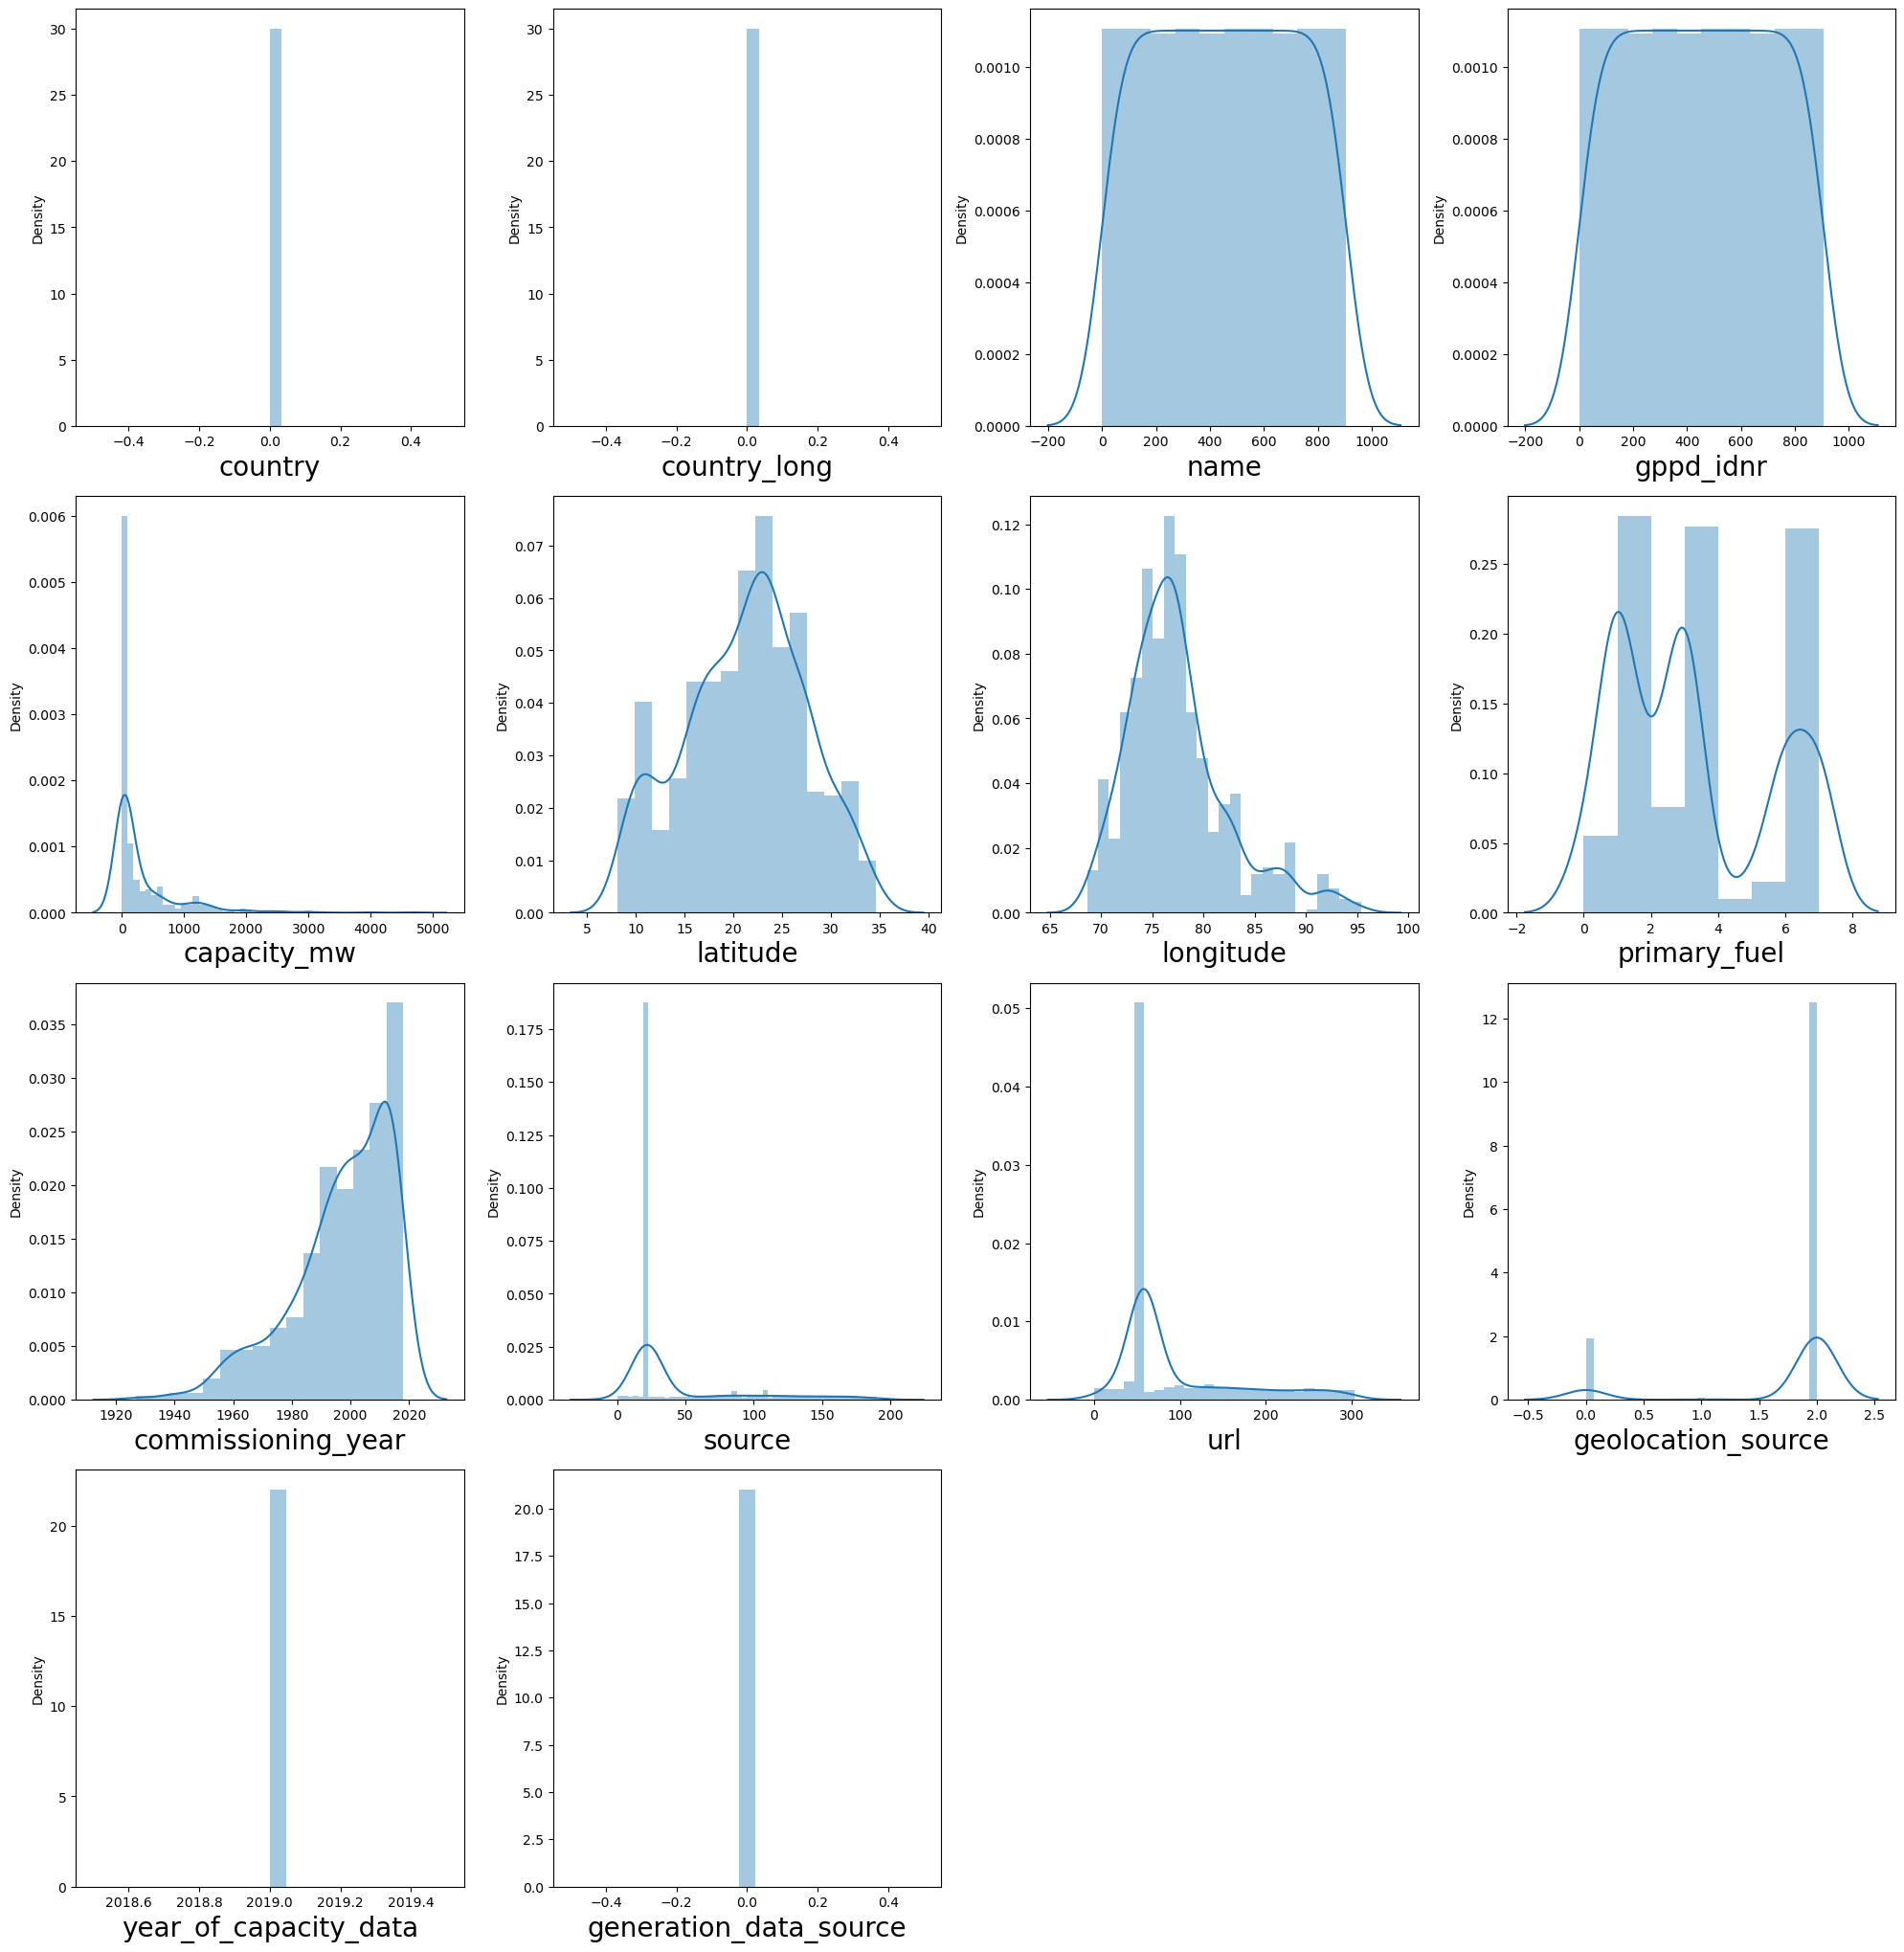

In [13]:
plt.figure(figsize=(20,25),facecolor='w')
plot=1
for i in data.columns:
    if plot<=18:
        ax=plt.subplot(5,4,plot)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.tight_layout()

In [14]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

0.0    907
Name: country, dtype: int64


0.0    907
Name: country_long, dtype: int64


0.0      1
623.0    1
597.0    1
598.0    1
599.0    1
        ..
306.0    1
307.0    1
308.0    1
309.0    1
906.0    1
Name: name, Length: 907, dtype: int64


657.0    1
336.0    1
326.0    1
501.0    1
616.0    1
        ..
155.0    1
156.0    1
157.0    1
158.0    1
876.0    1
Name: gppd_idnr, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64


71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64


1.0    258
3.0    251

In [15]:
data['latitude']=data['latitude'].fillna(data['latitude'].mean())

In [16]:
data['longitude']=data['longitude'].fillna(data['longitude'].mean())

In [17]:
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mean())

In [18]:
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])

In [19]:
data['year_of_capacity_data']=data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0])

In [20]:

data['generation_data_source']=data['generation_data_source'].fillna(data['generation_data_source'].mode()[0])

In [21]:
data.isna().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_data_source    0
dtype: int64

In [22]:
data.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_data_source
count,907.0,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.0
mean,0.0,0.0,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,1997.091082,43.847850,94.469680,1.733186,2019.0,0.0
std,0.0,0.0,261.972645,261.972645,590.085456,6.079148,4.812291,2.280652,13.016360,44.642818,70.381222,0.677151,0.0,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,2019.0,0.0
25%,0.0,0.0,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,1997.091082,22.000000,58.000000,2.000000,2019.0,0.0
50%,0.0,0.0,453.000000,453.000000,59.200000,21.281800,76.979200,3.000000,1997.091082,22.000000,58.000000,2.000000,2019.0,0.0
75%,0.0,0.0,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,2003.000000,29.500000,115.500000,2.000000,2019.0,0.0
max,0.0,0.0,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,2018.000000,190.000000,303.000000,2.000000,2019.0,0.0


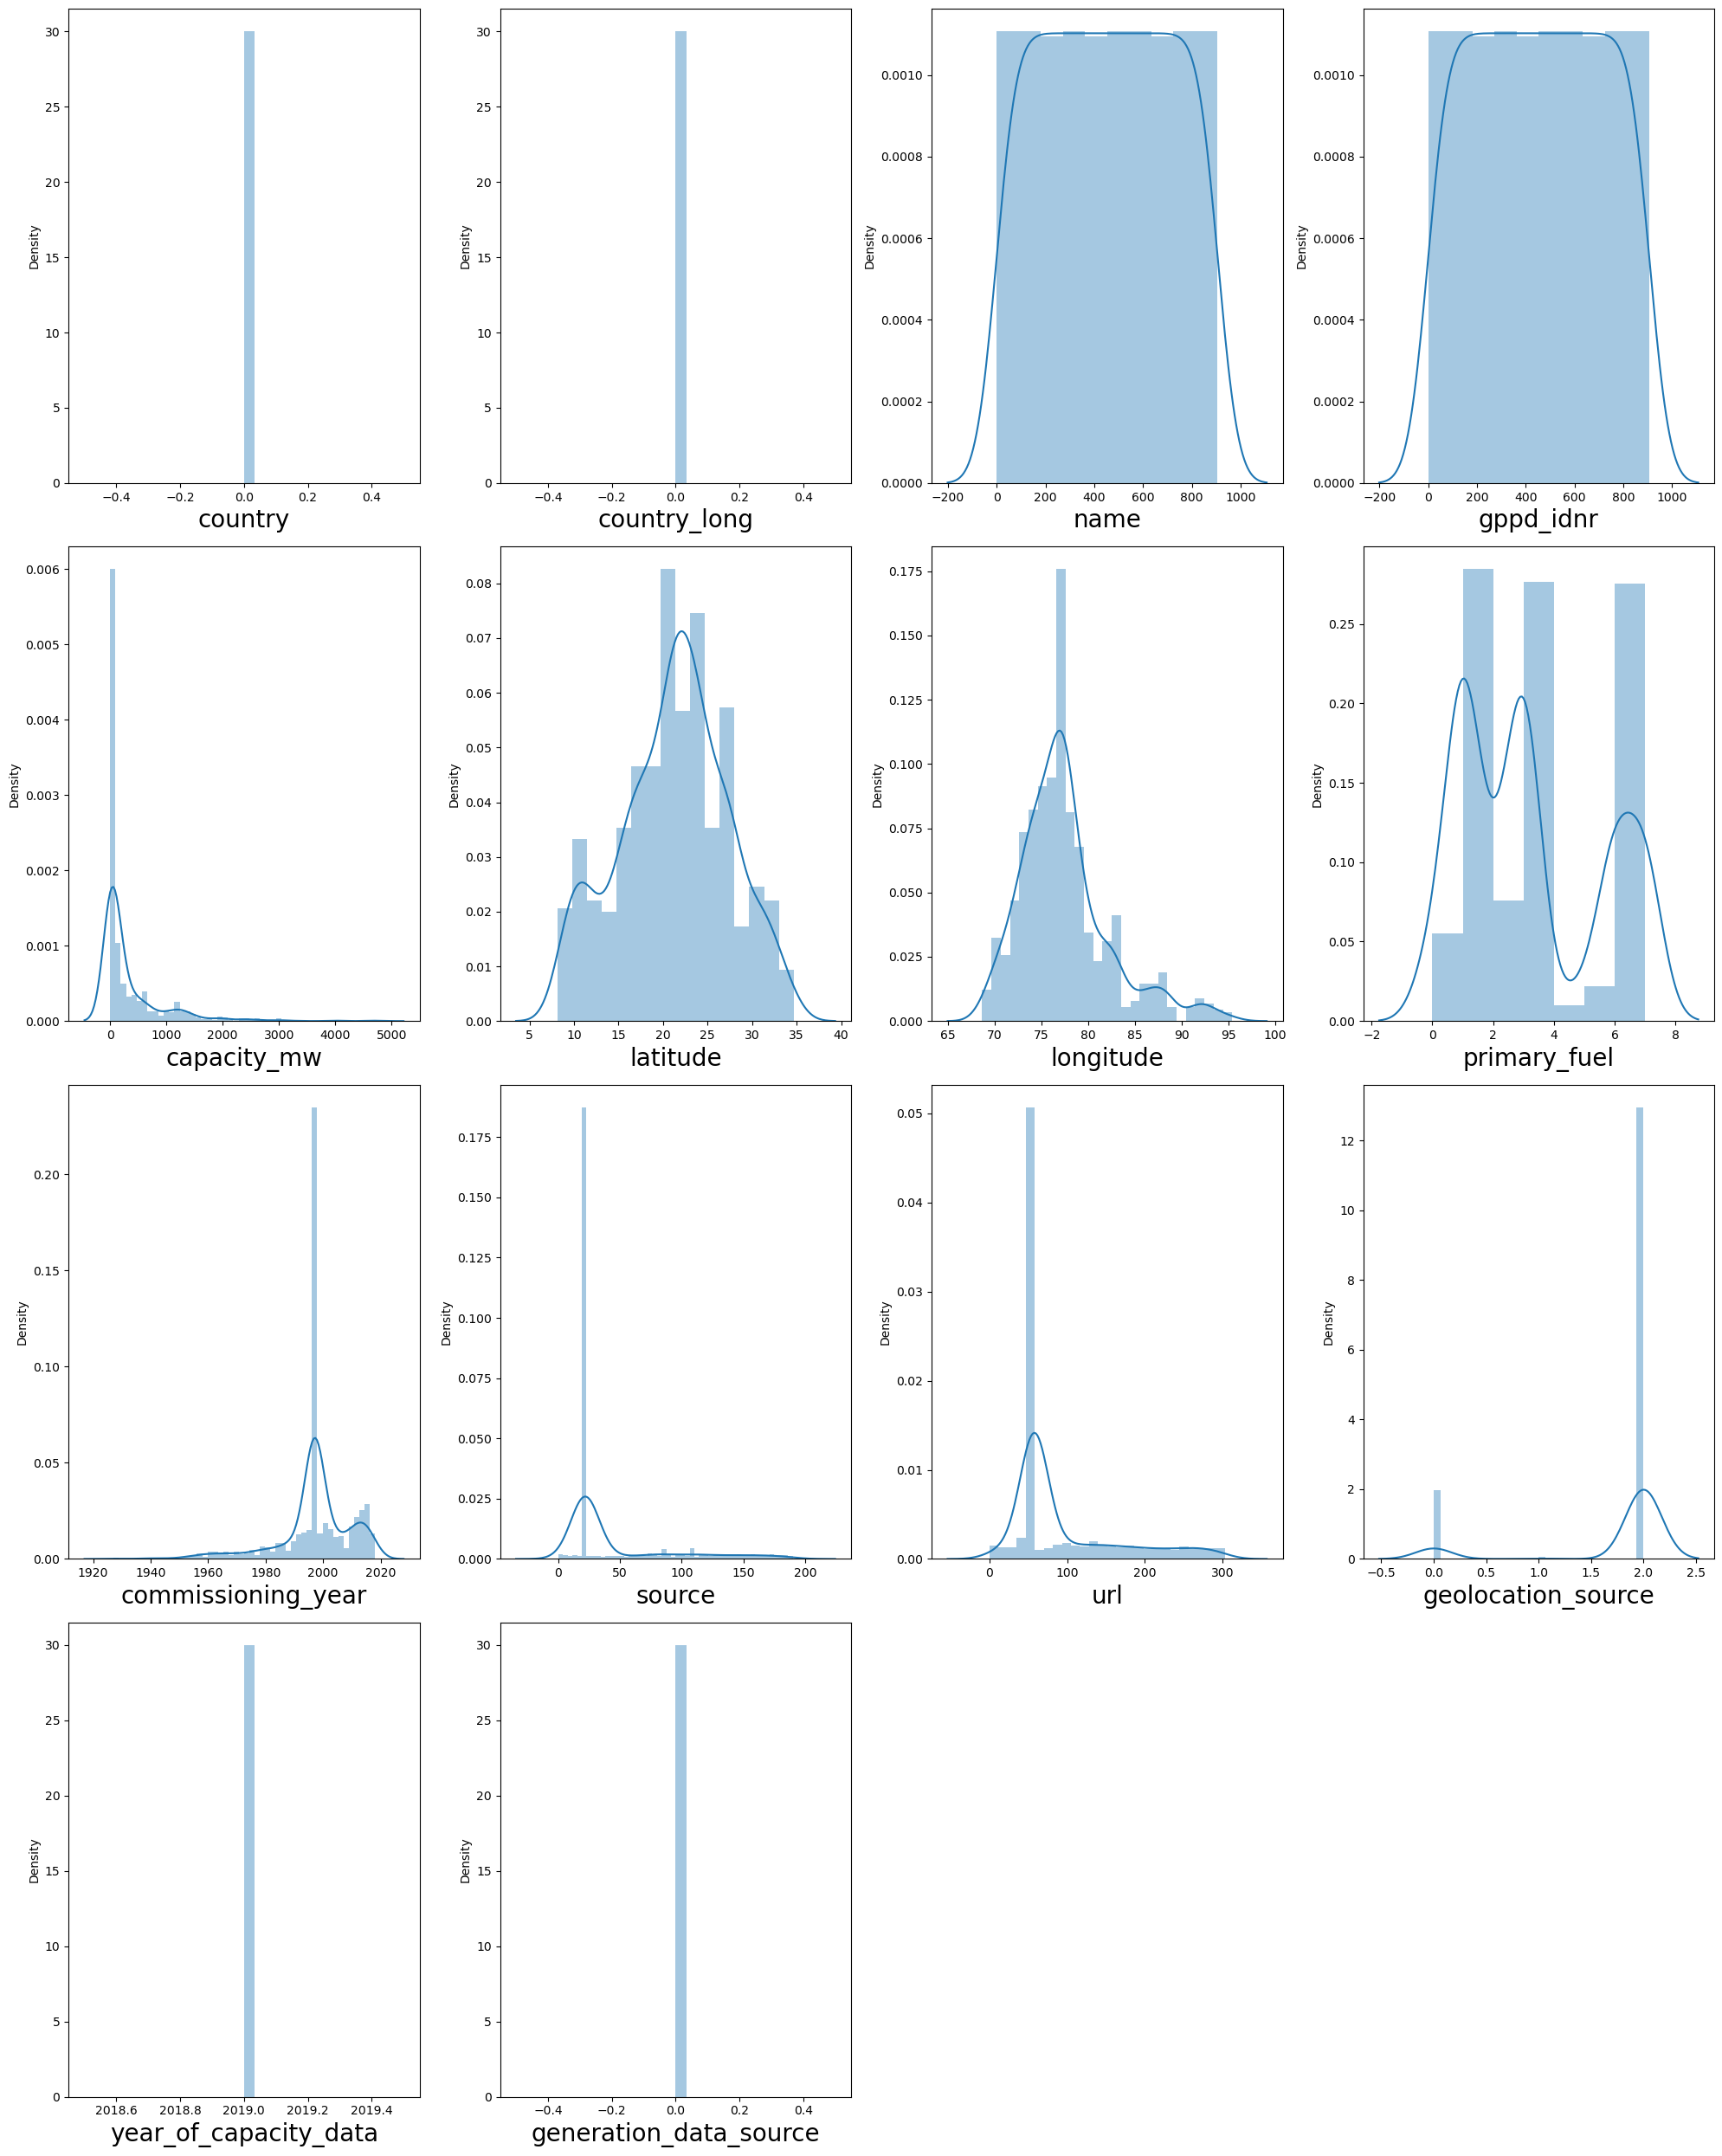

In [23]:
plt.figure(figsize=(20,25),facecolor='w')
plot=1
for i in data.columns:
    if plot<=18:
        ax=plt.subplot(4,4,plot)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.tight_layout()

country
country_long
name
gppd_idnr
capacity_mw
latitude
longitude
primary_fuel
commissioning_year
source
url
geolocation_source
year_of_capacity_data
generation_data_source


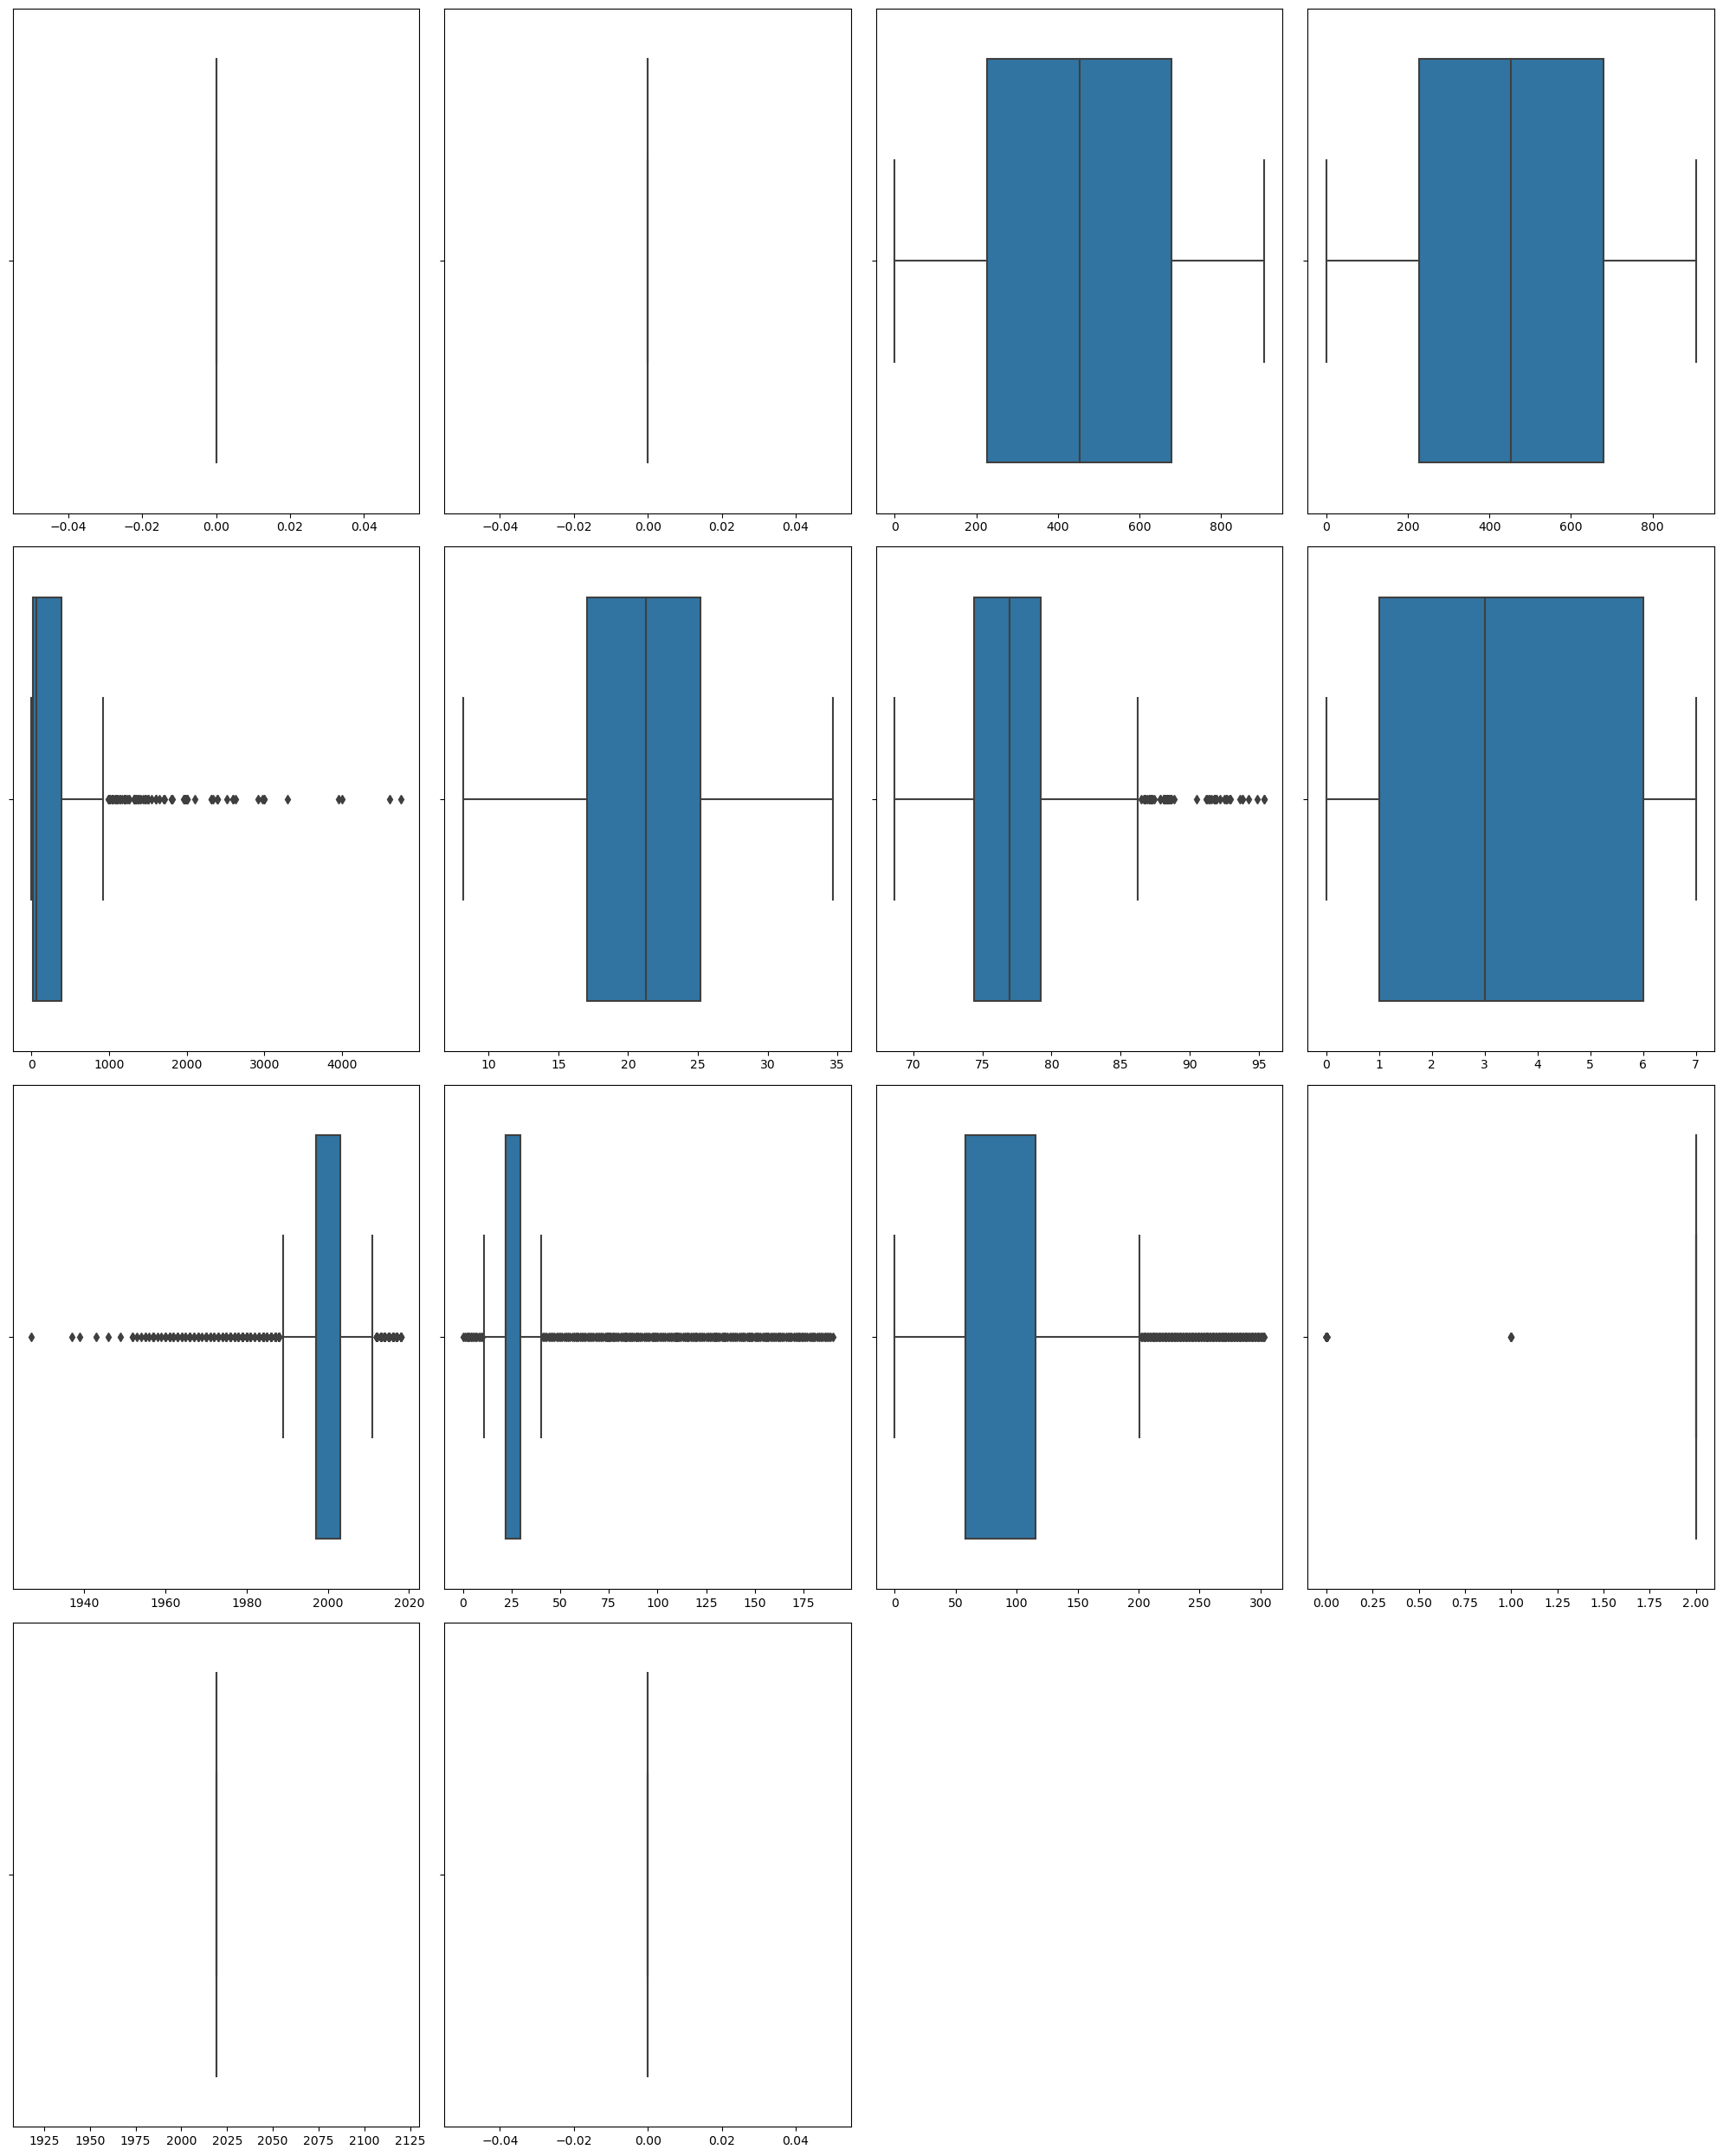

In [24]:
plt.figure(figsize=(20,25),facecolor='w')
plot=1
for i in data.columns:
    if plot<=18:
        ax=plt.subplot(4,4,plot)
        sns.boxplot(data[i])
        plt.xlabel(print(i),fontsize=20)
    plot+=1
plt.tight_layout()

In [25]:
data.skew()

country                   0.000000
country_long              0.000000
name                      0.000000
gppd_idnr                 0.000000
capacity_mw               3.123576
latitude                 -0.149698
longitude                 1.141881
primary_fuel              0.472251
commissioning_year       -1.399359
source                    1.827373
url                       1.510537
geolocation_source       -2.159841
year_of_capacity_data     0.000000
generation_data_source    0.000000
dtype: float64

In [26]:
q1=data.quantile(.25)
q3=data.quantile(.75)
iqr=q3-q1


In [27]:
lo_h=q3.longitude+(1.5*iqr.longitude)
ind_num=np.where(lo_h<data['longitude'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(845, 14)

In [28]:
ce_h=q3.commissioning_year+(1.5*iqr.commissioning_year)
ind_num=np.where(ce_h<data['commissioning_year'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(729, 14)

In [29]:
ce_l=q3.commissioning_year-(1.5*iqr.commissioning_year)
ind_num=np.where(ce_l>data['commissioning_year'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(555, 14)

In [30]:
s_h=q3.source+(1.5*iqr.source)
ind_num=np.where(s_h<data['source'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(348, 14)

In [31]:
s_l=q3.source-(1.5*iqr.source)
ind_num=np.where(s_l>data['source'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(321, 14)

In [32]:
url_h=q3.url+(1.5*iqr.url)
ind_num=np.where(url_h<data['url'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(223, 14)

In [33]:
data.skew()

country                   0.000000
country_long              0.000000
name                      0.027881
gppd_idnr                 0.659645
capacity_mw               2.877144
latitude                  0.113849
longitude                 0.280087
primary_fuel              0.991343
commissioning_year        0.473803
source                    4.027502
url                       2.178781
geolocation_source       -5.025078
year_of_capacity_data     0.000000
generation_data_source    0.000000
dtype: float64

In [34]:
for i in data.columns:
    if data[i].skew()!=0:
        data[i]=np.cbrt(data[i])

In [35]:
data.skew()

country                   0.000000
country_long              0.000000
name                     -0.812875
gppd_idnr                -0.466408
capacity_mw               0.666985
latitude                 -0.289574
longitude                 0.184778
primary_fuel             -0.662475
commissioning_year        0.472228
source                    3.812761
url                       0.880744
geolocation_source       -5.025078
year_of_capacity_data     0.000000
generation_data_source    0.000000
dtype: float64

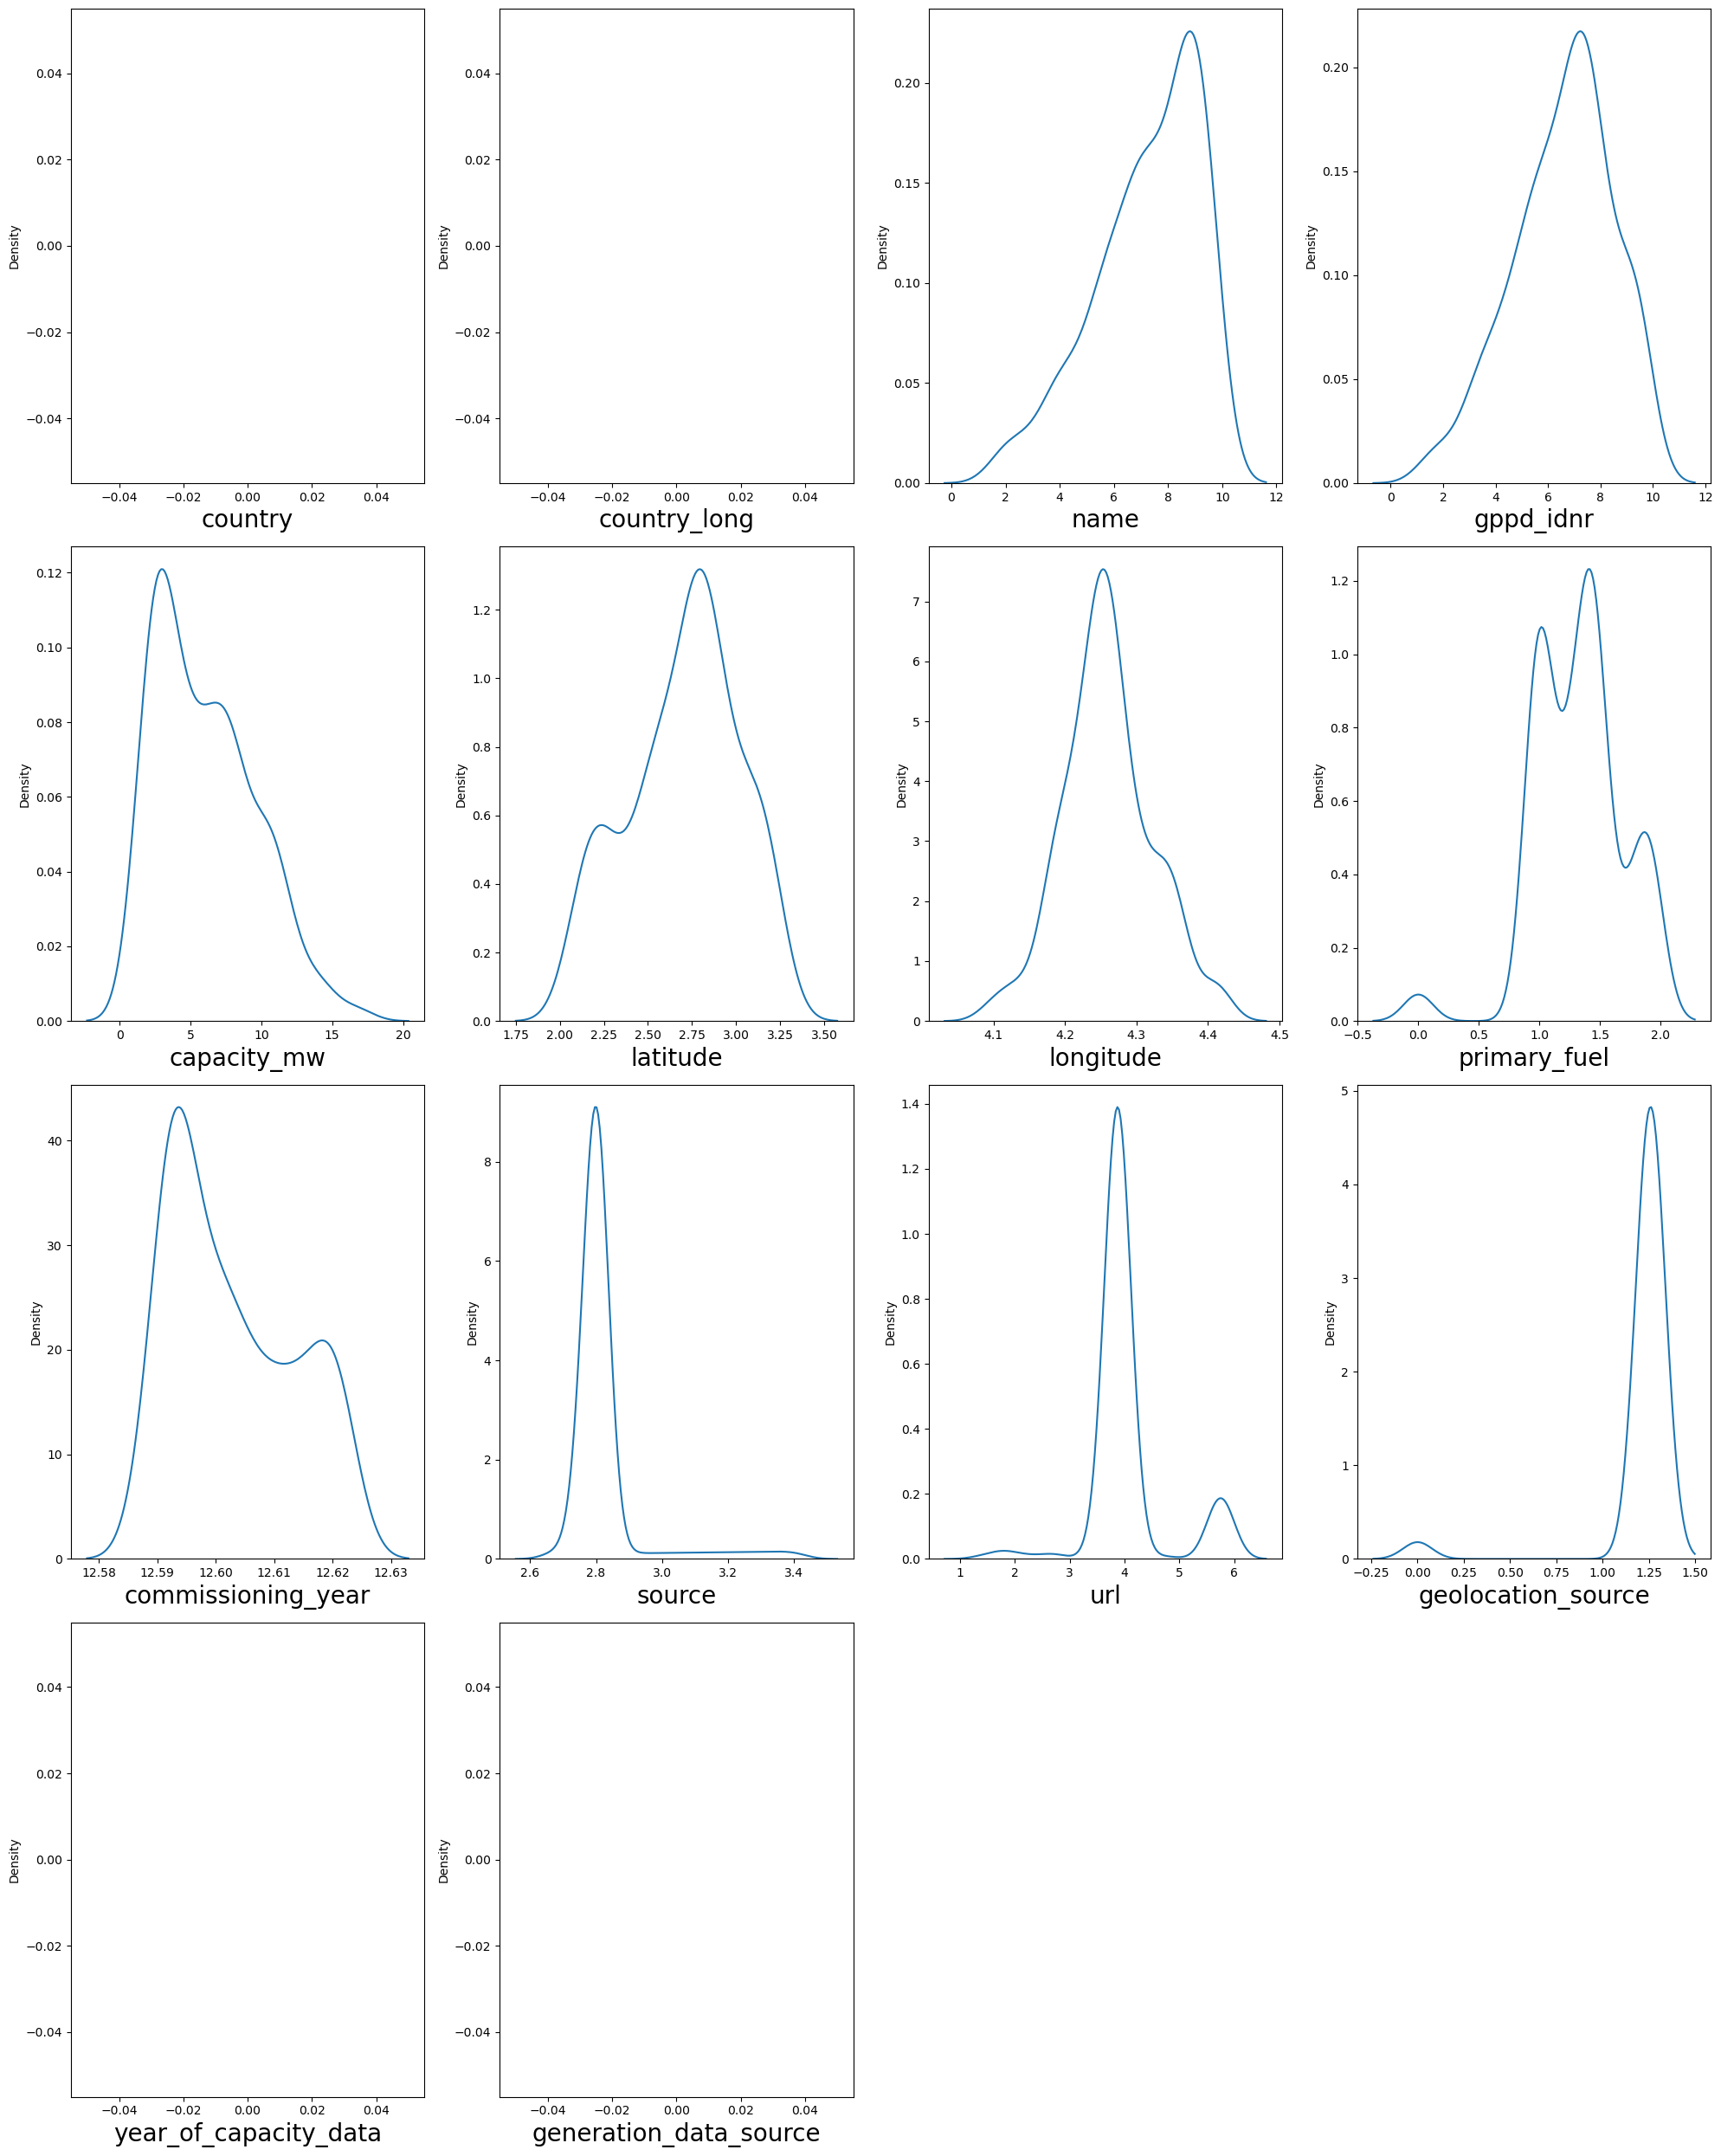

In [36]:
plt.figure(figsize=(20,25))
graph=1
for i in data.columns:
    if graph<=14:
        ax=plt.subplot(4,4,graph)
        sns.kdeplot(data[i])
        plt.xlabel(i,fontsize=20)
    graph+=1
plt.tight_layout()

In [37]:
x=data
y=data['capacity_mw']
z=data['primary_fuel']

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [39]:
scaler=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [40]:
scaler.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_data_source
0,0.0,0.0,-2.861622,-2.822006,0.065754,0.555258,-2.673518,-0.889423,0.644840,-0.193879,-0.238484,0.192897,0.0,0.0
1,0.0,0.0,-2.756268,-2.648185,-0.086337,1.547032,-0.024585,0.324644,1.641181,-0.193879,-0.238484,0.192897,0.0,0.0
2,0.0,0.0,-2.711070,-2.583124,0.157334,-0.537040,-0.419936,0.324644,0.445373,-0.193879,-0.238484,0.192897,0.0,0.0
3,0.0,0.0,-2.669499,-2.526254,-0.036198,0.475823,1.269588,-0.889423,1.242843,-0.193879,-0.238484,0.192897,0.0,0.0
4,0.0,0.0,-2.560828,-2.386677,1.306021,0.611160,1.601443,-0.889423,1.840251,-0.193879,-0.238484,0.192897,0.0,0.0


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
x1=scaler.drop(columns='capacity_mw')

In [43]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x1,i) for i in range(x1.shape[1])]
vif['features']=x1.columns

In [44]:
vif

,values,features
0,NaN,country
1,NaN,country_long
2,2.560685,name
3,3.695186,gppd_idnr
4,1.126550,latitude
5,1.114286,longitude
6,2.660135,primary_fuel
7,1.421668,commissioning_year
8,2.479244,source
9,2.824232,url


In [45]:
x1.drop(columns=['country','country_long','generation_data_source','year_of_capacity_data'],inplace=True)

In [46]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x1,i) for i in range(x1.shape[1])]
vif['features']=x1.columns
vif

,values,features
0,2.560685,name
1,3.695186,gppd_idnr
2,1.126550,latitude
3,1.114286,longitude
4,2.660135,primary_fuel
5,1.421668,commissioning_year
6,2.479244,source
7,2.824232,url
8,2.606317,geolocation_source


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.25,random_state=65)

# capacity_mw

In [49]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [50]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [51]:
dtr.score(x_train,y_train)

1.0

In [52]:
dtr.score(x_test,y_test)

-0.008126507483928957

In [53]:
y_pred=dtr.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score,r2_score

In [55]:
r2_score(y_test,y_pred)

-0.008126507483928957

In [56]:
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier

In [57]:
knr=KNeighborsRegressor()

In [58]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [59]:
knr.score(x_train,y_train)

0.589033687895263

In [60]:
knr.score(x_test,y_test)

0.23444795845074307

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
!pip install xgboost 

Defaulting to user installation because normal site-packages is not writeable


In [63]:
from xgboost import XGBRegressor

In [64]:
model=XGBRegressor()

In [65]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
y_pred=model.predict(x_test)

In [67]:
r2_score(y_test,y_pred)

0.3593794471380709

In [68]:
model.score(x_train,y_train)

0.9999993229675532

In [69]:
np.array(y_pred)

array([ 1.770843 ,  9.860962 ,  1.9505616,  8.244643 , 10.910467 ,
        2.1584   ,  3.807413 ,  1.8165572,  2.228995 ,  2.254186 ,
        7.088472 ,  1.8707216,  3.1702533,  3.4574337,  1.339152 ,
       11.045972 ,  7.329786 ,  7.1819377,  7.2228193, 11.962078 ,
        3.309224 ,  5.7029977,  8.369612 ,  4.6079288,  2.7706547,
        5.4151535,  4.863731 , 11.092928 ,  2.6777363,  3.7863314,
        7.631231 ,  7.8934755,  9.740399 ,  3.166852 , 10.958051 ,
        3.4928105,  9.384212 ,  9.112935 , 12.111417 ,  2.4533575,
       12.607564 ,  3.747091 ,  2.3652983,  2.34143  ,  5.3502955,
        7.832454 , 10.644423 ,  5.6652837,  5.967406 ,  5.8407516,
        3.6843264,  4.5586457,  1.8980424,  5.206367 ,  6.00753  ,
        9.73478  ], dtype=float32)

In [70]:
np.array(y_test)

array([ 7.82973528, 11.8166575 ,  1.73247821,  7.76708682, 12.16440399,
        2.75892418,  3.07231683,  2.71441762,  1.44224957,  3.25226666,
        8.43432665,  4.71769398,  3.91486764,  3.30192725,  2.82310809,
        5.94392195,  6.91042323,  7.63845925,  6.48160479, 10.        ,
        1.70997595, 10.        , 11.98145283,  2.5198421 ,  3.30192725,
       10.        ,  3.27106631,  3.91486764,  1.48880555,  2.93179442,
        8.41177487,  8.01559458,  7.63460672,  3.10723251,  9.72588826,
        4.73262349, 10.62658569,  8.57261888,  7.93700526,  3.09336075,
        7.93700526,  4.57885697,  2.26370239,  4.21716333, 11.44714243,
        6.29960525,  8.57261888,  2.08008382,  6.61910595, 11.44714243,
        2.75892418,  4.93242415,  3.2396118 ,  3.91486764,  4.93242415,
        7.53318627])

In [71]:
p_grid={
    'learning_rate':[1.0,0.5,0.25,0.1,0.01],
    'max_depth':[3,4,5,6],
    'n_estimators':[10,20,50,80]
}


In [72]:
grid=GridSearchCV(model,param_grid=p_grid,verbose=3)

In [73]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END learning_rate=1.0, max_depth=3, n_estimators=10;, score=0.246 total time=   0.0s
[CV 2/5] END learning_rate=1.0, max_depth=3, n_estimators=10;, score=0.073 total time=   0.0s
[CV 3/5] END learning_rate=1.0, max_depth=3, n_estimators=10;, score=0.321 total time=   0.0s
[CV 4/5] END learning_rate=1.0, max_depth=3, n_estimators=10;, score=0.571 total time=   0.0s
[CV 5/5] END learning_rate=1.0, max_depth=3, n_estimators=10;, score=0.215 total time=   0.0s
[CV 1/5] END learning_rate=1.0, max_depth=3, n_estimators=20;, score=0.042 total time=   0.0s
[CV 2/5] END learning_rate=1.0, max_depth=3, n_estimators=20;, score=-0.022 total time=   0.0s
[CV 3/5] END learning_rate=1.0, max_depth=3, n_estimators=20;, score=0.307 total time=   0.0s
[CV 4/5] END learning_rate=1.0, max_depth=3, n_estimators=20;, score=0.531 total time=   0.0s
[CV 5/5] END learning_rate=1.0, max_depth=3, n_estimators=20;, score=0.079 total time=   0.

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                        

In [74]:
grid.best_params_

{'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 10}

In [75]:
new_model=XGBRegressor(learning_rate=.25,max_depth=3,n_estimators=10)


In [76]:
new_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
new_model.score(x_test,y_test)

0.4898900801682743

In [78]:
ypred_new=new_model.predict(x_test)

In [79]:
r2_score(y_test,ypred_new)

0.4898900801682743

In [80]:
print('actual=',np.array(y_test),'\n','predicted=',np.array(ypred_new))

actual= [ 7.82973528 11.8166575   1.73247821  7.76708682 12.16440399  2.75892418
  3.07231683  2.71441762  1.44224957  3.25226666  8.43432665  4.71769398
  3.91486764  3.30192725  2.82310809  5.94392195  6.91042323  7.63845925
  6.48160479 10.          1.70997595 10.         11.98145283  2.5198421
  3.30192725 10.          3.27106631  3.91486764  1.48880555  2.93179442
  8.41177487  8.01559458  7.63460672  3.10723251  9.72588826  4.73262349
 10.62658569  8.57261888  7.93700526  3.09336075  7.93700526  4.57885697
  2.26370239  4.21716333 11.44714243  6.29960525  8.57261888  2.08008382
  6.61910595 11.44714243  2.75892418  4.93242415  3.2396118   3.91486764
  4.93242415  7.53318627] 
 predicted= [ 3.640626   8.733961   2.539318   7.3795395  9.68877    2.5611126
  4.997835   2.4922595  2.5611126  2.7122936  8.103755   3.640626
  6.4006863  5.085375   2.388137   9.1667595  6.6449404  6.529459
  5.7066097 10.072246   2.8950357  5.9577727  6.0783224  3.6771414
  4.2408385  6.9337645  4.41034

# Primary Fuel prediction


In [81]:
x.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_data_source
5,0.0,0.0,1.709976,1.259921,6.299605,2.875211,4.094514,1.00000,12.609701,2.802039,3.870877,1.259921,2019.0,0.0
7,0.0,0.0,1.912931,1.587401,5.768998,3.182252,4.258130,1.44225,12.620174,2.802039,3.870877,1.259921,2019.0,0.0
8,0.0,0.0,2.000000,1.709976,6.619106,2.537048,4.233710,1.44225,12.607604,2.802039,3.870877,1.259921,2019.0,0.0
9,0.0,0.0,2.080084,1.817121,5.943922,2.850619,4.338067,1.00000,12.615987,2.802039,3.870877,1.259921,2019.0,0.0
12,0.0,0.0,2.289428,2.080084,10.626586,2.892517,4.358564,1.00000,12.622267,2.802039,3.870877,1.259921,2019.0,0.0


In [82]:
z.head()

5     1.00000
7     1.44225
8     1.44225
9     1.00000
12    1.00000
Name: primary_fuel, dtype: float64

In [83]:
z.value_counts()

1.000000    70
1.442250    70
1.259921    33
1.912931    26
1.709976     8
1.817121     8
0.000000     5
1.587401     3
Name: primary_fuel, dtype: int64

In [84]:
x.drop(columns='primary_fuel',inplace=True)

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,z,test_size=.25,random_state=23)

In [86]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [87]:
def metrics_score(dtc,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=dtc.predict(x_train)
        print('/n-----train_result------')
        print(f'accuracy_score,{r2_score(y_train,y_pred)*100}%')
        
    elif train==False:
        pred=dtc.predict(x_test)
        print('\n-----test_result------')
        print(f'accuracy_score,{r2_score(y_test,pred)*100}%')
        

In [88]:
metrics_score(dtc,x_train,x_test,y_train,y_test,train=True)
metrics_score(dtc,x_train,x_test,y_train,y_test,train=False)

/n-----train_result------
accuracy_score,100.0%

-----test_result------
accuracy_score,53.917971803155275%


In [89]:
parm_grid={
    'max_depth':range(10,12),
    'max_leaf_nodes':range(5,8),
    'min_samples_split':range(4,6),
    'min_samples_leaf':range(2,5)}

In [90]:
grid=GridSearchCV(dtc,parm_grid)

In [91]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(10, 12),
                         'max_leaf_nodes': range(5, 8),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(4, 6)})

In [92]:
grid.best_params_

{'max_depth': 11,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [93]:
reg=DecisionTreeRegressor(max_depth=10,
 max_leaf_nodes= 7,
 min_samples_leaf= 2,
 min_samples_split= 5)

In [94]:
reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=7, min_samples_leaf=2,
                      min_samples_split=5)

In [95]:
reg.score(x_test,y_test)

0.6046568685401812

In [96]:
y_pred=reg.predict(x_test)

In [97]:
r2_score(y_test,y_pred)

0.6046568685401812

In [98]:
reg.score(x_train,y_train)

0.831012731447816